In [ ]:
%tensorflow_version 2.x
import tensorflow as tf;
print("GPU device name:",tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

GPU device name: 
Num GPUs Available:  0


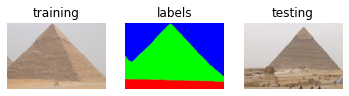

In [ ]:
#import tensorflow as tf;
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #this layer will be densely connected
import cv2;#import the openCV module
import math;
import random;
import sys;
import numpy as np#for array/matrix calculations
from matplotlib import pyplot as plt #for plotting graphs
#to show the graph figure in the jupyter notebook (show it underneath this code)
%matplotlib inline 
orgimg=cv2.imread('pyramid2.jpeg')#training image
img=cv2.cvtColor(orgimg,cv2.COLOR_BGR2RGB);
orgimg_label=cv2.imread('pyramid2_label.jpeg')#training labels
img_label=cv2.cvtColor(orgimg_label,cv2.COLOR_BGR2RGB);
org_test_img=cv2.imread('pyramid1.jpeg')#test image
img_test=cv2.cvtColor(org_test_img,cv2.COLOR_BGR2RGB);
plt.subplot(131);plt.imshow(img);plt.title('training');plt.axis('off')
plt.subplot(132);plt.imshow(img_label);plt.title('labels');plt.axis('off');
plt.subplot(133);plt.imshow(img_test);plt.title('testing');plt.axis('off');
plt.show()

In [ ]:
#load the training data
width=img.shape[1];height=img.shape[0];
No_training_samples=30000;
training_data=np.zeros([No_training_samples,3]);
#note: I used 3 outputs instead of 1 (i.e. separate the r,g,b)
training_label=np.zeros([No_training_samples,3]);
for i in range(No_training_samples):
    rx=int(random.random()*width);
    ry=int(random.random()*height);
    training_data[i]=img[ry,rx]/256;#normalise the data -> in range 0 to 1
    if (img_label[ry,rx,0]>200): training_label[i][0]=1;
    elif(img_label[ry,rx,1]>200):training_label[i][1]=1;
    else:training_label[i][2]=1;
x_train=training_data;
y_train=training_label;

In [ ]:
#Build the ANN model
model=Sequential() #a model with a series of layers
model.add(Dense(units=1600, activation='relu', input_shape=(3,)))
model.add(Dense(units=1600,activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.summary() #show the model summary
#compile the model
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 1600)              6400      
                                                                 
 dense_28 (Dense)            (None, 1600)              2561600   
                                                                 
 dense_29 (Dense)            (None, 3)                 4803      
                                                                 
Total params: 2,572,803
Trainable params: 2,572,803
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model
history=model.fit(x_train,y_train,epochs=3,verbose=1)

Epoch 1/3
938/938 [==============================] - 49s 51ms/step - loss: 0.2663 - accuracy: 0.9051
Epoch 2/3
938/938 [==============================] - 33s 35ms/step - loss: 0.1795 - accuracy: 0.9411
Epoch 3/3
938/938 [==============================] - 34s 37ms/step - loss: 0.1676 - accuracy: 0.9479


In [ ]:
#show inference results
def ANN_Segmentation():
    #prepare the validation set
    validateset=np.zeros([width*height,3]);
    j=0;
    for y in range(height):
        for x in range(width):
            validateset[j]=img_test[y,x]/256;
            j+=1;
    prediction=model.predict(validateset);#perform model prediction 
    resultimg=img_test.copy();    j=0;
    for y in range(height):
        for x in range(width):
            outputlayer=prediction[j];
            j+=1;
            if (outputlayer[0]>=outputlayer[1] and outputlayer[0]>=outputlayer[2]):
                resultimg[y,x,0]=255;resultimg[y,x,1]=0;resultimg[y,x,2]=0;
            elif (outputlayer[1]>outputlayer[0] and outputlayer[1]>=outputlayer[2]):
                resultimg[y,x,1]=255;resultimg[y,x,0]=0;resultimg[y,x,2]=0;
            else: resultimg[y,x,2]=255;resultimg[y,x,1]=0;resultimg[y,x,0]=0;
    return resultimg;

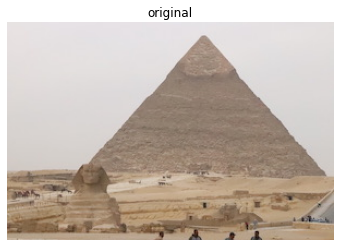

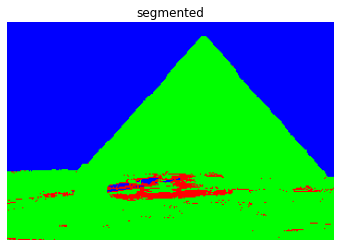

In [ ]:
resultimg=ANN_Segmentation();#segment the image with ANN
#show the results
plt.imshow(img_test);plt.title('original');plt.axis('off');plt.show();
plt.imshow(resultimg);plt.title('segmented');plt.axis('off');plt.show()   